![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/01_Machine%20Learning%20%26%20Linear%20Regression/01_ml-linear-regression_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- The following list shows the names of tables we can work with:

In [12]:
import plotly.express as px
import pandas as pd
import seaborn as sns #!
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

- We might see the all the tables and its data in [this GitHub repo](https://github.com/mwaskom/seaborn-data).
- Substitue the `name` by the dataset you want:

In [13]:
df_flights = sns.load_dataset(name='flights')
df_flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [53]:
df_flightsYear = df_flights.groupby(by='year', as_index=False).sum('passengers')

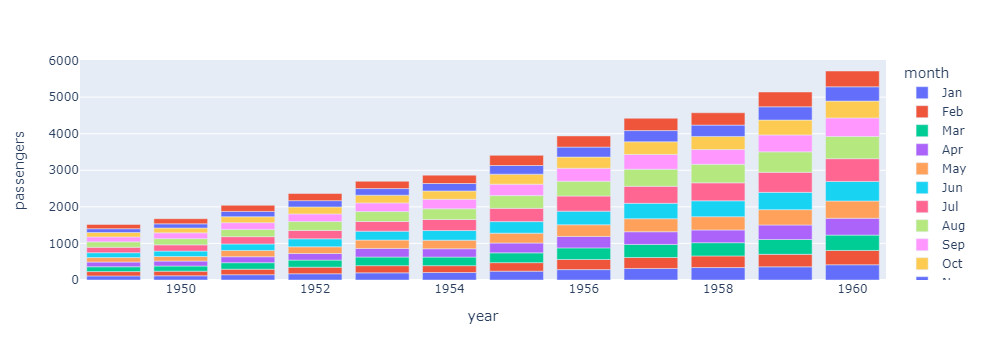

In [18]:
px.bar(data_frame=df_flights, x='year', y='passengers', color='month')

## `LinearRegression()` Model in Python

###¿Cuantos pasajeros viajaran en 2000?

### Fit the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_lr = LinearRegression()

In [54]:
target = df_flightsYear.passengers

In [55]:
feature = df_flightsYear[['year']]

In [56]:
model_lr.fit(X=feature, y=target)

LinearRegression()

In [57]:
model_lr.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['year'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([383.08741259]),
 'rank_': 1,
 'singular_': array([11.95826074]),
 'intercept_': -745380.7645687645}

### Calculate Predictions

In [58]:
model_lr.predict(X= feature)

array([1256.6025641 , 1639.68997669, 2022.77738928, 2405.86480186,
       2788.95221445, 3172.03962704, 3555.12703963, 3938.21445221,
       4321.3018648 , 4704.38927739, 5087.47668998, 5470.56410256])

### Create a New DataFrame for the Predictions

In [76]:
df_flightsYear['passengers_pred_lr']= model_lr.predict(X= feature)

### Visualize the Model

1. The `x-axis` is represented by the **explanatory variable** you used to fit the model.
2. The `y-axis` is represented by the **predictions** you computed before.

<AxesSubplot: xlabel='year', ylabel='passengers'>

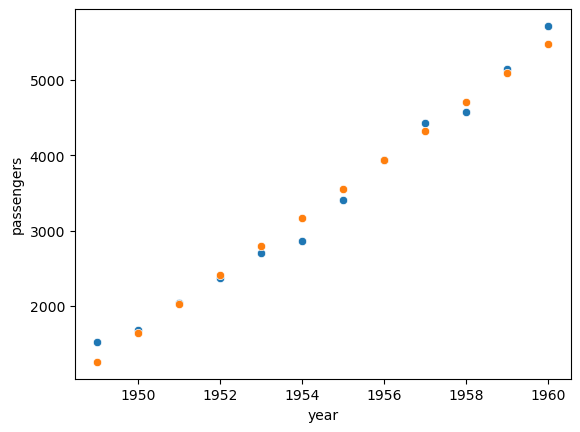

In [77]:
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers')
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers_pred_lr')

### Model Interpretation

1. Especify the **mathematical equation** of the model.
2. **Interpret the coefficients** from the equation.

### Model's Score

In [65]:
model_lr.score(X=feature, y=target)

0.9866055381778157

## `KNeighborsRegressor()` in Python

### Fit the Model

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
model_kr= KNeighborsRegressor()


In [69]:
model_kr.fit(X=feature, y=target)

KNeighborsRegressor()

### Calculate Predictions

In [75]:
model_kr.predict(X=feature)

array([2060.4, 2060.4, 2060.4, 2329.8, 2676.2, 3055.6, 3467. , 3841.4,
       4296. , 4757.2, 4757.2, 4757.2])

In [78]:
df_flightsYear['passengers_pred_kr'] = model_kr.predict(X=feature)

### Model's Score

In [79]:
model_kr.score(X=feature, y=target)

0.9246687167671575

## `GradientBoostingRegressor()` in Python

### Fit the Model

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
model_gr = GradientBoostingRegressor()

In [93]:
model_gr.fit(X=feature, y=target)

GradientBoostingRegressor()

### Calculate Predictions

In [94]:
model_gr.predict(X=feature)

array([1520.06551891, 1676.05104815, 2042.03549839, 2364.02882933,
       2700.01934545, 2867.0071878 , 3407.99723758, 3938.98532219,
       4420.9736316 , 4571.96240069, 5139.94540064, 5713.92857928])

In [98]:
df_flightsYear['passengers_pred_gr']= model_gr.predict(X=feature)
df_flightsYear

,year,passengers,passengers_pred,passengers_pred_lr,passengers_pred_kr,passegers_pred_gr,passengers_pred_gr
0,1949,1520,1256.602564,1256.602564,2060.4,1520.065519,1520.065519
1,1950,1676,1639.689977,1639.689977,2060.4,1676.051048,1676.051048
2,1951,2042,2022.777389,2022.777389,2060.4,2042.035498,2042.035498
3,1952,2364,2405.864802,2405.864802,2329.8,2364.028829,2364.028829
4,1953,2700,2788.952214,2788.952214,2676.2,2700.019345,2700.019345
5,1954,2867,3172.039627,3172.039627,3055.6,2867.007188,2867.007188
6,1955,3408,3555.127040,3555.127040,3467.0,3407.997238,3407.997238
7,1956,3939,3938.214452,3938.214452,3841.4,3938.985322,3938.985322
8,1957,4421,4321.301865,4321.301865,4296.0,4420.973632,4420.973632
9,1958,4572,4704.389277,4704.389277,4757.2,4571.962401,4571.962401


### Model's Score

In [96]:
model_gr.score(X=feature, y=target)

0.9999999990677504

## Visualize the 3 Models

<AxesSubplot: xlabel='year', ylabel='passengers'>

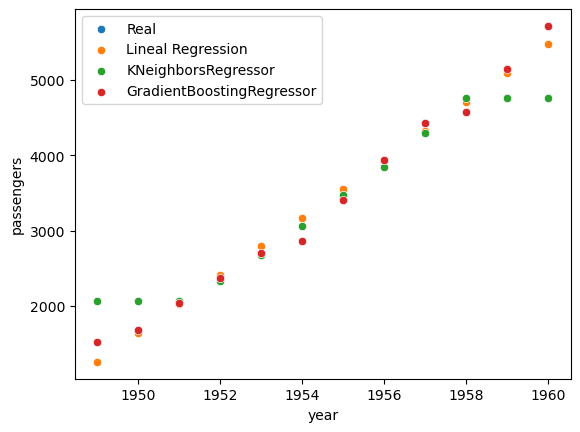

In [99]:
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers', label='Real')
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers_pred_lr',label='Lineal Regression')
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers_pred_kr', label='KNeighborsRegressor')
sns.scatterplot(data=df_flightsYear, x='year',y= 'passengers_pred_gr', label='GradientBoostingRegressor')


## Which One Is the Best Model? Why?

In [100]:
###GradientBoostingRegressor es practicamente igual.

In [104]:
###¿Cuantos pasajeros viajaran en 2000?

array([1520.06551891, 1676.05104815, 2042.03549839, 2364.02882933,
       2700.01934545, 2867.0071878 , 3407.99723758, 3938.98532219,
       4420.9736316 , 4571.96240069, 5139.94540064, 5713.92857928])

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.